## Setting up Kaggle & Downloading the Dataset

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aishwaryamenon15","key":"059532ade2144fde97eb970bd1f9bdd7"}'}

In [2]:
!pip install -q kaggle

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!mkdir traffic_sign_dataset
%cd traffic_sign_dataset

mkdir: cannot create directory ‘traffic_sign_dataset’: File exists
/content/traffic_sign_dataset


In [5]:
!kaggle datasets list -s gtsrb-german-traffic-sign

ref                                                                title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meowmeowmeowmeowmeow/gtsrb-german-traffic-sign                     GTSRB - German Traffic Sign Recognition Benchmark  612MB  2018-11-25 18:12:34         109691       1106  0.8235294        
valentynsichkar/traffic-signs-preprocessed                         Traffic Signs Preprocessed                           4GB  2019-08-31 18:22:11          14419        287  1.0              
harbhajansingh21/german-traffic-sign-dataset                       German Traffic Sign Dataset                        118MB  2023-07-11 04:21:24            918         31  1.0              
ibrahimkaratas/gtsrb-german-traffic-sign-recogniti

In [6]:
!kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
%cd ..

Dataset URL: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
License(s): CC0-1.0
 98% 597M/612M [00:04<00:00, 169MB/s]
100% 612M/612M [00:04<00:00, 144MB/s]
/content


In [7]:
!unzip traffic_sign_dataset/gtsrb-german-traffic-sign.zip -d traffic_sign_dataset
!rm -rf traffic_sign_dataset/Meta
!rm -rf traffic_sign_dataset/meta
!rm -rf traffic_sign_dataset/Train.csv
!rm -rf traffic_sign_dataset/test
!rm -rf traffic_sign_dataset/train
!rm -rf traffic_sign_dataset/Meta.csv

Archive:  traffic_sign_dataset/gtsrb-german-traffic-sign.zip
  inflating: traffic_sign_dataset/Meta.csv  
  inflating: traffic_sign_dataset/Meta/.~lock.ClassesInformation.ods#  
  inflating: traffic_sign_dataset/Meta/.~lock.ClassesInformationStrong.ods#  
  inflating: traffic_sign_dataset/Meta/0.png  
  inflating: traffic_sign_dataset/Meta/1.png  
  inflating: traffic_sign_dataset/Meta/10.png  
  inflating: traffic_sign_dataset/Meta/11.png  
  inflating: traffic_sign_dataset/Meta/12.png  
  inflating: traffic_sign_dataset/Meta/13.png  
  inflating: traffic_sign_dataset/Meta/14.png  
  inflating: traffic_sign_dataset/Meta/15.png  
  inflating: traffic_sign_dataset/Meta/16.png  
  inflating: traffic_sign_dataset/Meta/17.png  
  inflating: traffic_sign_dataset/Meta/18.png  
  inflating: traffic_sign_dataset/Meta/19.png  
  inflating: traffic_sign_dataset/Meta/2.png  
  inflating: traffic_sign_dataset/Meta/20.png  
  inflating: traffic_sign_dataset/Meta/21.png  
  inflating: traffic_sign_d

## Import Libraries

In [8]:
# Importing necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import random
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D

## Data Processing and Visualization

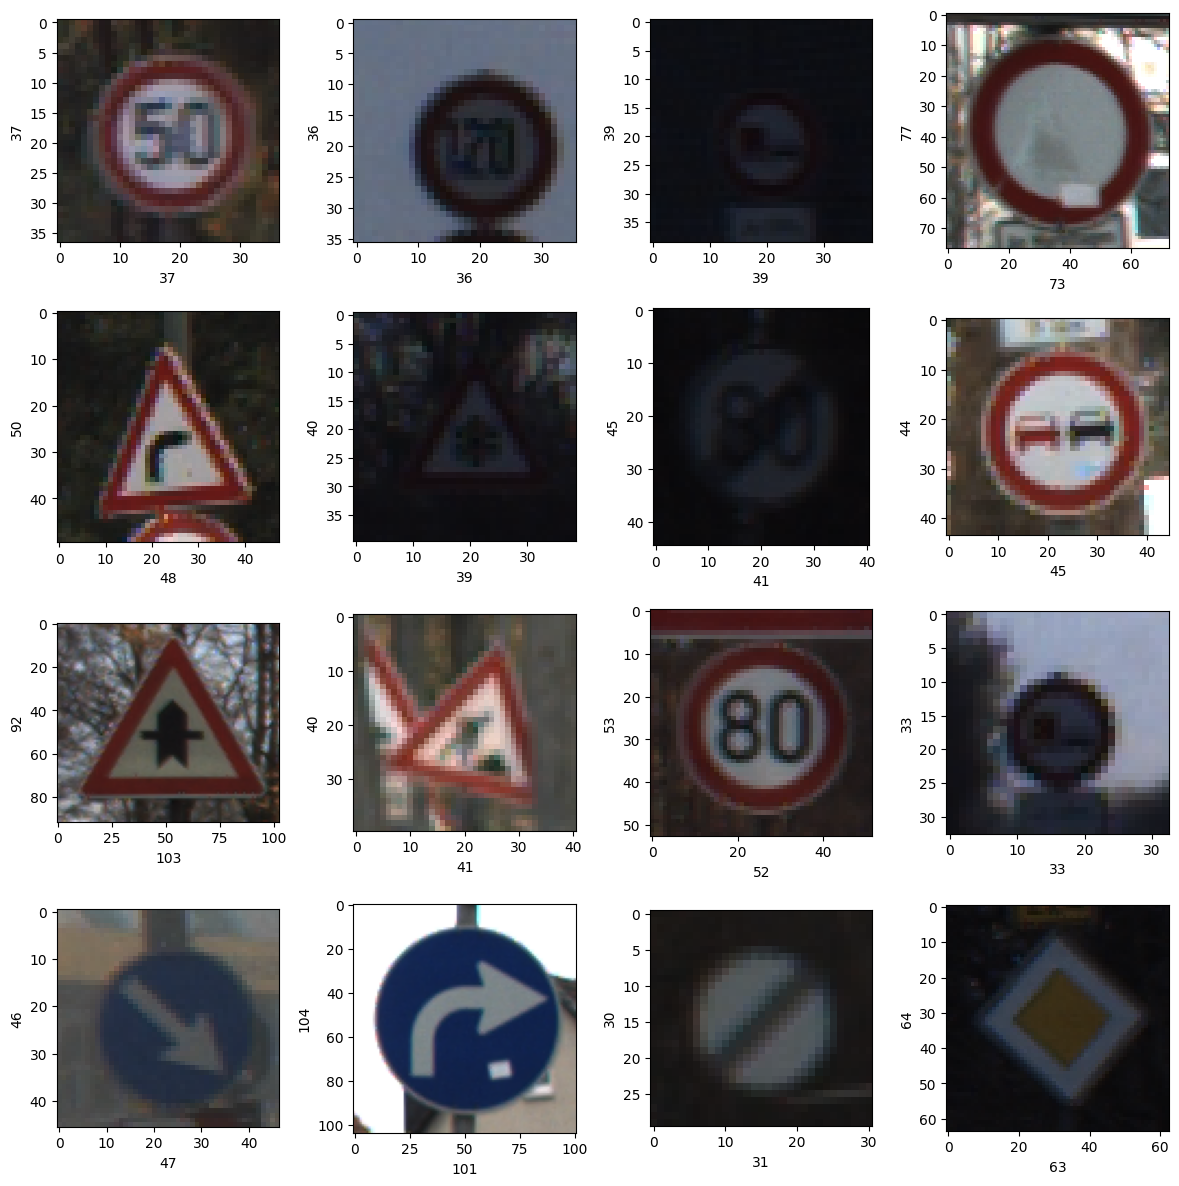

In [9]:
# Plot some images to check the dataset
plt.figure(figsize=(12,12))
path = "traffic_sign_dataset/Test"
for i in range(1,17):
  plt.subplot(4,4,i)
  plt.tight_layout()
  rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1], fontsize=10) # width
  plt.ylabel(rand_img.shape[0], fontsize=10) # height

Since size of the images are different, we have to make them equal.

So we'll take mean of dimensions

In [10]:
dim1, dim2 = [], []

for i in range(len(os.listdir("traffic_sign_dataset/Train"))):
  labels = 'traffic_sign_dataset/Train' + '/{0}'.format(i)
  image_path = os.listdir(labels)
  for x in image_path:
    img = imread(labels + '/' + x)
    dim1.append(img.shape[0])
    dim2.append(img.shape[1])

In [11]:
print(f'''
Mean Height (dim1): {round(np.mean(dim1),2)}
Mean Width (dim2): {round(np.mean(dim2),2)}
      ''')


Mean Height (dim1): 50.33
Mean Width (dim2): 50.84
      


In [12]:
# Reshape the images to (50,50)
images = []
label_id = []

for i in range(len(os.listdir("traffic_sign_dataset/Train"))):
  labels = "traffic_sign_dataset/Train"+"/{0}".format(i)
  image_path = os.listdir(labels)
  for x in image_path:
    img = Image.open(labels + '/' + x)
    img = img.resize((50,50))
    img = np.array(img)
    images.append(img)
    label_id.append(i)

In [13]:
type(images)

list

array([[[ 64,  78,  52],
        [ 81,  92,  58],
        [ 89,  96,  60],
        ...,
        [ 53,  45,  41],
        [ 54,  44,  42],
        [ 56,  44,  39]],

       [[ 75,  84,  61],
        [ 83,  90,  62],
        [ 91,  95,  62],
        ...,
        [ 54,  47,  45],
        [ 58,  49,  48],
        [ 64,  55,  51]],

       [[ 80,  83,  65],
        [ 84,  87,  63],
        [ 89,  90,  61],
        ...,
        [ 57,  50,  46],
        [ 60,  54,  51],
        [ 65,  59,  54]],

       ...,

       [[129, 123, 128],
        [ 85,  84,  85],
        [ 59,  63,  63],
        ...,
        [ 51,  50,  45],
        [ 55,  50,  44],
        [ 56,  49,  44]],

       [[123, 121, 125],
        [ 85,  84,  85],
        [ 62,  62,  61],
        ...,
        [ 47,  46,  42],
        [ 51,  48,  44],
        [ 55,  49,  45]],

       [[115, 116, 121],
        [ 83,  83,  84],
        [ 64,  63,  63],
        ...,
        [ 44,  44,  40],
        [ 48,  46,  42],
        [ 51,  47,  43]]], dtype=uint8)
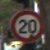

In [14]:
images[0]

In [15]:
# Normalization
images = np.array(images)
images = images/255

In [16]:
type(images)

numpy.ndarray

In [17]:
label_id = np.array(label_id)
label_id.shape

(39209,)

In [18]:
images.shape

(39209, 50, 50, 3)

In [19]:
label_counts = pd.DataFrame(label_id).value_counts()
label_counts.head()

2     2250
1     2220
13    2160
12    2100
38    2070
Name: count, dtype: int64

Here's we can see the top 5 classes are already balanced.

In [20]:
# Splitting the data
X_train, X_val, y_train, y_val = train_test_split(images, label_id, test_size=0.2, random_state=42)

In [21]:
y_train[:5], y_val[:5]

(array([36, 28,  2,  5, 26]), array([26, 15, 13, 10, 15]))

**NOTE: We do OHE on the labels to avoid prioritization**


Labels are the target variables that a machine learning model predicts. In classification tasks, these labels are often categorical. If the labels are encoded as integers (e.g., 0, 1, 2), some machine learning algorithms might interpret these integer values as having an order or priority. This can lead to unintended consequences:

Ordinal Assumption: The model might assume that label 2 is somehow "greater than" label 1, and label 1 is "greater than" label 0. This can influence the model to find patterns based on this assumed order, which is incorrect for purely categorical data.

Distance Misinterpretation: In algorithms that rely on distance calculations (e.g., k-nearest neighbors), the model might incorrectly compute distances between labels, treating them as points on a numerical scale rather than distinct categories.

In [22]:
# Apply OHE on labels
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)

In [23]:
X_train.shape[1:]

(50, 50, 3)

## Model Architecture

In [24]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(5,5), input_shape=X_train.shape[1:], activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation='softmax'))

Since we have 43 classes, the data is very diverse. So in this case, the regular `categorical_crossentropy` wouldn't suffice. Thus, we will make use of the `sparse_categorical_crossentropy`

In [25]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 64)        4864      
                                                                 
 max_pooling2d (MaxPooling2  (None, 25, 25, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 25, 25, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 11, 11, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 11, 11, 64)        0

## Model Training

In [26]:
model.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_val, y_val), verbose=2)

Epoch 1/50
246/246 - 13s - loss: 2.2455 - accuracy: 0.3872 - val_loss: 0.7071 - val_accuracy: 0.8381 - 13s/epoch - 53ms/step
Epoch 2/50
246/246 - 5s - loss: 0.8442 - accuracy: 0.7364 - val_loss: 0.2733 - val_accuracy: 0.9472 - 5s/epoch - 20ms/step
Epoch 3/50
246/246 - 5s - loss: 0.5644 - accuracy: 0.8224 - val_loss: 0.1761 - val_accuracy: 0.9723 - 5s/epoch - 19ms/step
Epoch 4/50
246/246 - 5s - loss: 0.4423 - accuracy: 0.8607 - val_loss: 0.1173 - val_accuracy: 0.9779 - 5s/epoch - 19ms/step
Epoch 5/50
246/246 - 5s - loss: 0.3609 - accuracy: 0.8855 - val_loss: 0.0894 - val_accuracy: 0.9839 - 5s/epoch - 21ms/step
Epoch 6/50
246/246 - 6s - loss: 0.3194 - accuracy: 0.8969 - val_loss: 0.0729 - val_accuracy: 0.9857 - 6s/epoch - 23ms/step
Epoch 7/50
246/246 - 5s - loss: 0.2850 - accuracy: 0.9094 - val_loss: 0.0586 - val_accuracy: 0.9888 - 5s/epoch - 21ms/step
Epoch 8/50
246/246 - 5s - loss: 0.2510 - accuracy: 0.9197 - val_loss: 0.0536 - val_accuracy: 0.9907 - 5s/epoch - 20ms/step
Epoch 9/50
246

## Model Evaluation

<Axes: >

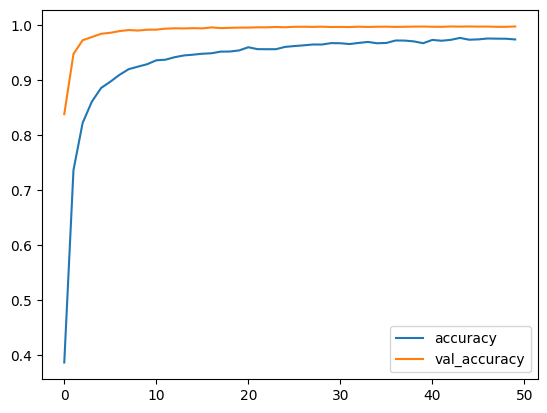

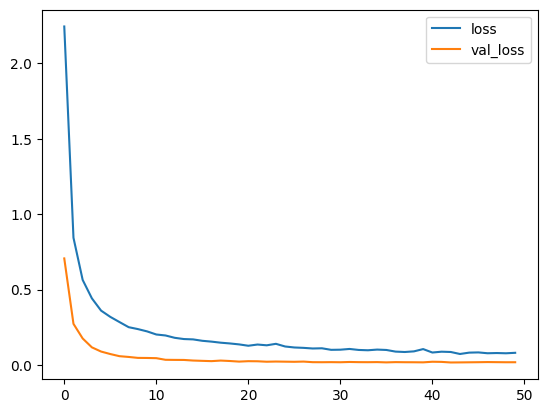

In [27]:
evaluation = pd.DataFrame(model.history.history)
evaluation[['accuracy', 'val_accuracy']].plot()
evaluation[['loss', 'val_loss']].plot()

## Transform the Test Data

In [28]:
test_path = 'traffic_sign_dataset/Test'
!rm traffic_sign_dataset/Test/GT-final_test.csv

rm: cannot remove 'traffic_sign_dataset/Test/GT-final_test.csv': No such file or directory


In [29]:
# Scale and Transform the Test Data (similar to Train Data)
def scaling(test_images, test_path):
  images = []
  image_path = test_images

  for x in image_path:
    img = Image.open(test_path + '/' + x)
    img = img.resize((50,50))
    img = np.array(img)
    images.append(img)

  # Normalize
  images = np.array(images)
  images = images/255

  return images

In [30]:
test_images = scaling(os.listdir(test_path), test_path)

In [31]:
test = pd.read_csv('traffic_sign_dataset/Test.csv')
test.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [32]:
y_test = test['ClassId'].values
y_test

array([16,  1, 38, ...,  6,  7, 10])

In [33]:
y_pred = model.predict(test_images)
y_pred = np.argmax(y_pred, axis=1)
y_pred

395/395 [==============================] - 1s 2ms/step


array([ 5, 13,  9, ..., 19, 23, 12])

## Prediction

In [34]:
# Storing all lables
all_labels = ['Speed limit (20km/h)','Speed limit (30km/h)','Speed limit (50km/h)','Speed limit (60km/h)',
              'Speed limit (70km/h)','Speed limit (80km/h)','End of speed limit (80km/h)','Speed limit (100km/h)',
              'Speed limit (120km/h)','No passing','No passing for vechiles over 3.5 metric tons',
              'Right-of-way at the next intersection','Priority road','Yield','Stop','No vechiles',
              'Vechiles over 3.5 metric tons prohibited','No entry','General caution','Dangerous curve to the left',
              'Dangerous curve to the right','Double curve','Bumpy road','Slippery road','Road narrows on the right',
              'Road work','Traffic signals','Pedestrians','Children crossing','Bicycles crossing','Beware of ice/snow',
              'Wild animals crossing','End of all speed and passing limits','Turn right ahead','Turn left ahead',
              'Ahead only','Go straight or right','Go straight or left','Keep right','Keep left','Roundabout mandatory',
              'End of no passing','End of no passing by vechiles over 3.5 metric']

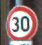

In [38]:
# Visualize test image
img = Image.open(test_path + '/00001.png')
img

In [40]:
# Print out the result
print(f'''
  Original: {all_labels[y_test[5]]}
  Predicted: {all_labels[y_pred[5]]}
''')


  Original: Keep right
  Predicted: Priority road    



## Saving the Model

In [37]:
model.save('tf_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
